In [1]:
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# nltk.download('gutenberg')
# nltk.download('stopwords')

corpus = nltk.corpus.gutenberg.raw('austen-sense.txt')

In [3]:
seq_len=5
# Removing all the noise
def denoise_text(text):
    # remove html strips
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # replace \n with space
    text = re.sub('\n', ' ', text)
    # remove square brackets
    text = re.sub('\[[^]]*\]', '', text)
    # replace punctuation with space
    text = re.sub(r'[,.;@#?!&$\-]+\*', ' ', text, flags=re.VERBOSE)
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # replace extra spaces with single space
    text = re.sub(' +', ' ', text)
    
    return text.lower().strip()


corpus = denoise_text(corpus)
words = corpus.split(' ')

unique_words = set(words)
vocab_size = len(unique_words)+1

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(words)
sequences = tokenizer.texts_to_sequences(words)

input_sequences = []
output_sequences = []

for i in range(len(sequences) - seq_len):
    seq = sequences[i:i+seq_len]
    if len(seq) == seq_len and len(sequences[i+seq_len]) > 0:
        input_sequences.append(seq)
        output_sequences.append(sequences[i+seq_len][0])

X = np.array(input_sequences)
y = to_categorical(output_sequences, num_classes=vocab_size)

print(X.shape)
print(y.shape)

(120751, 5, 1)
(120751, 6331)


In [4]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=seq_len))
model.add(LSTM(500, return_sequences=True))
model.add(LSTM(250))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 100)            633100    
                                                                 
 lstm (LSTM)                 (None, 5, 500)            1202000   
                                                                 
 lstm_1 (LSTM)               (None, 250)               751000    
                                                                 
 dense (Dense)               (None, 6331)              1589081   
                                                                 
Total params: 4,175,181
Trainable params: 4,175,181
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
236/236 [==============================] - 8s 11ms/step - loss: 6.6249
Epoch 2/150
236/236 [==============================] - 2s 11ms/step - loss: 6.3677
Epoch 3/150
236/236 [==============================] - 2s 11ms/step - loss: 6.1826
Epoch 4/150
236/236 [==============================] - 2s 11ms/step - loss: 5.9288
Epoch 5/150
236/236 [==============================] - 2s 11ms/step - loss: 5.7163
Epoch 6/150
236/236 [==============================] - 2s 11ms/step - loss: 5.5134
Epoch 7/150
236/236 [==============================] - 3s 11ms/step - loss: 5.3662
Epoch 8/150
236/236 [==============================] - 2s 11ms/step - loss: 5.2490
Epoch 9/150
236/236 [==============================] - 2s 11ms/step - loss: 5.1406
Epoch 10/150
236/236 [==============================] - 2s 11ms/step - loss: 5.0454
Epoch 11/150
236/236 [==============================] - 2s 11ms/step - loss: 4.9616
Epoch 12/150
236/236 [==============================] - 3s 11ms/step - loss: 4.8839
E

236/236 [==============================] - 3s 11ms/step - loss: 0.3193
Epoch 99/150
236/236 [==============================] - 3s 11ms/step - loss: 0.3002
Epoch 100/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2800
Epoch 101/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2621
Epoch 102/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2488
Epoch 103/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2371
Epoch 104/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2267
Epoch 105/150
236/236 [==============================] - 3s 11ms/step - loss: 0.2121
Epoch 106/150
236/236 [==============================] - 3s 11ms/step - loss: 0.1974
Epoch 107/150
236/236 [==============================] - 3s 11ms/step - loss: 0.1847
Epoch 108/150
236/236 [==============================] - 3s 11ms/step - loss: 0.1772
Epoch 109/150
236/236 [==============================] - 3s 11ms/step - loss: 0.

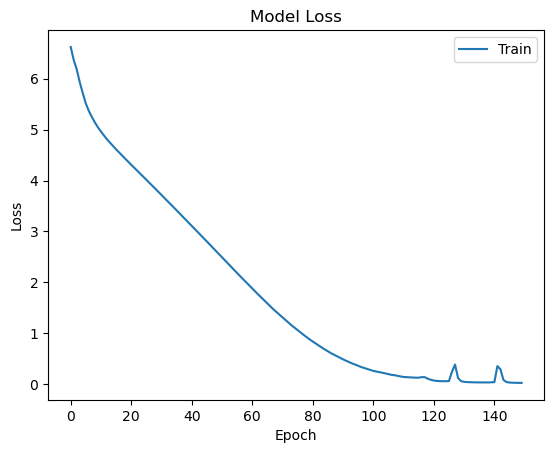

In [5]:
history = model.fit(X, y, epochs=150, batch_size=512)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

In [10]:
seed_text = "his natural shyness was overcome"
seed_text = seed_text.split(' ')
output_text = seed_text

for _ in range(100):
    token_list = np.array(tokenizer.texts_to_sequences(output_text[-seq_len:]))
    token_list = token_list.reshape(1,token_list.shape[0])
    prediction_prob = model.predict(token_list,verbose=0)[0]
    prediction=np.argmax(prediction_prob)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == prediction:
            output_word = word
            break
    output_text.append(output_word)

output=""
for word in output_text:
    output+=word+" "

print(output)
    
    

his natural shyness was overcome his behaviour gave every indication of an open affectionate heart his understanding was good and his education had given it solid improvement but he was neither fitted by abilities nor disposition to answer the wishes of his mother and sister who longed to see him distinguished as they hardly knew what they wanted him to make a fine figure in the world in some manner or other his mother wished to interest him in political concerns to get him into parliament or to see him connected with some of the great men of the day mrs john dashwood wished it 
